# Recommendtion System for Ecommerce Shop

#### Importing packages

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
print("import complete")

import complete


#### Data Importation

In [2]:

data = pd.read_csv('ratings_beauty.csv')
print("Import complete")

Import complete


#### Data exploration

In [3]:
#Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [4]:
#summarize the data
data.describe()

,Rating,Timestamp
count,2.023070e+06,2.023070e+06
mean,4.149036e+00,1.360389e+09
std,1.311505e+00,4.611860e+07
min,1.000000e+00,9.087552e+08
25%,4.000000e+00,1.350259e+09
50%,5.000000e+00,1.372810e+09
75%,5.000000e+00,1.391472e+09
max,5.000000e+00,1.406074e+09


In [5]:
#Shape of the data
data.shape

(2023070, 4)

In [6]:
#Displaying the first five columns of the data
data.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [7]:
data.tail()

,UserId,ProductId,Rating,Timestamp
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200
2023069,A1PB6OT0OOPKNQ,B00LU0LTOU,5.0,1405641600


In [8]:
#checking for missing values
data.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

### Visualization

In [9]:
#Importing Seaborn - a visualization library
import seaborn as sns

<AxesSubplot:xlabel='Rating', ylabel='count'>

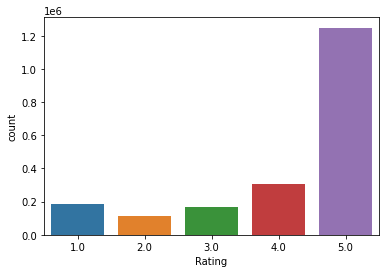

In [10]:
#Count number of every ratng graphically
sns.countplot(x='Rating', data=data)

In [11]:
#How many users have given a particular rating
data.groupby('Rating')['UserId'].count()

Rating
1.0     183784
2.0     113034
3.0     169791
4.0     307740
5.0    1248721
Name: UserId, dtype: int64

### Data Preprocesing

In [12]:
#removing timestamp column because we don't need it.
data.drop('Timestamp', inplace= True, axis= 1)
data

,UserId,ProductId,Rating
0,A39HTATAQ9V7YF,0205616461,5.0
1,A3JM6GV9MNOF9X,0558925278,3.0
2,A1Z513UWSAAO0F,0558925278,5.0
3,A1WMRR494NWEWV,0733001998,4.0
4,A3IAAVS479H7M7,0737104473,1.0
...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0


In [13]:
#create a dataframe with average rating in one column
rating= pd.DataFrame(data.groupby('ProductId')['Rating'].mean().sort_values(ascending=False))

#create another column with number of rating given to that product
rating['number of rating'] = pd.DataFrame(data.groupby('ProductId')['Rating'].count().sort_values(ascending=False))
rating.sort_values('number of rating',ascending=False)

,Rating,number of rating
ProductId,,
B001MA0QY2,4.321386,7533
B0009V1YR8,3.568839,2869
B0043OYFKU,4.310456,2477
B0000YUXI0,4.405040,2143
B003V265QW,4.365421,2088
...,...,...
B0013H228W,5.000000,1
B0013GNAIE,5.000000,1
B0013GNAG6,5.000000,1


In [14]:
#Checking number of unique users
data['UserId'].nunique()
# data.ProductId.nunique()

1210271

In [15]:
#Reducing sample size
print(data.shape)
#Reduce the quatity
data = data.sample(n=10000)
data.shape


(2023070, 3)


(10000, 3)

<AxesSubplot:xlabel='Rating', ylabel='count'>

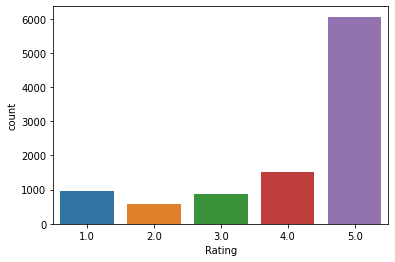

In [16]:
sns.countplot(x='Rating', data=data)

In [18]:
data.head()

,UserId,ProductId,Rating
1058195,A1R508CWVFMZF1,B003JCJ53O,5.0
392250,A1Z54EM24Y40LL,B000QUM5LG,5.0
1893915,AHIB2LR1QL65P,B00CUXW846,3.0
1308100,A1TO007Z3GUK5B,B004V0SZNO,5.0
495266,A7B7LMRC84ZSW,B000ZMBSPE,5.0


In [19]:
#create a dataframe with average rating in one column
rating= pd.DataFrame(data.groupby('ProductId')['Rating'].mean().sort_values(ascending=False))

#create another column with number of rating given to that product
rating['number of rating'] = pd.DataFrame(data.groupby('ProductId')['Rating'].count().sort_values(ascending=False))
rating.sort_values('number of rating',ascending=False)

,Rating,number of rating
ProductId,,
B001MA0QY2,4.214286,42
B0009V1YR8,2.900000,20
B000FS05VG,3.875000,16
B00538TSMU,3.230769,13
B0043OYFKU,4.846154,13
...,...,...
B000PAY5U6,5.000000,1
B000PY2JE6,5.000000,1
B000PY7R52,5.000000,1


<AxesSubplot:xlabel='ProductId'>

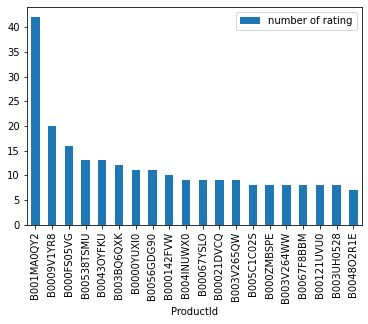

In [20]:
#Top 20 products sell by ecommerce website shown graphically

rating[['number of rating']].sort_values('number of rating',ascending=False).head(20).plot(kind='bar')

In [21]:
#Top 5 most popular products to be recommended to a new user
popular_products = rating[['number of rating']].sort_values('number of rating',ascending=False).head()
popular_products

,number of rating
ProductId,
B001MA0QY2,42
B0009V1YR8,20
B000FS05VG,16
B00538TSMU,13
B0043OYFKU,13


### Machine Learning

In [22]:
#create a user item matrix. 
ratings_utility_matrix = data.pivot_table(values='Rating', index='UserId', columns='ProductId')
ratings_utility_matrix.head(10)

ProductId,9759091062,978807121X,9788072216,978807250X,9790770944,9790777450,9790777884,9790782667,9790794665,9790798075,...,B00KHH2VOY,B00KKYJ2IW,B00KLZO2JE,B00KQ4PEBU,B00KQBR9FM,B00KWE08Q0,B00KWFDBKE,B00KYF03BM,B00L5JHZJO,B00LCEROA2
UserId,,,,,,,,,,,,,,,,,,,,,
A00258542AL4VKETFLGIJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A00463203QYS5I5X6MMXW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A00667432UL1ZRFLQA836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A01254332UU57MKWKP4VI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A016255899ADBITA1BCS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A01651383LK6L03VRGTF6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A01836141R5V4GOTIUND1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A029813613XQMSQO8N3LA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A059899119L7CHCKBYQRD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
ratings_utility_matrix.shape

(9873, 8178)

In [24]:
ratings_utility_matrix.fillna(0, inplace=True)

In [25]:
# Transpose the matrix
X = ratings_utility_matrix.T

In [26]:
X.head()

UserId,A00258542AL4VKETFLGIJ,A00463203QYS5I5X6MMXW,A00667432UL1ZRFLQA836,A01254332UU57MKWKP4VI,A016255899ADBITA1BCS,A01651383LK6L03VRGTF6,A01836141R5V4GOTIUND1,A029813613XQMSQO8N3LA,A059899119L7CHCKBYQRD,A06170512LLXAS5ND7UQB,...,AZWH7BMFRTDW6,AZX0EC75MAQBQ,AZXEQ9JZ77DYG,AZXMRR9E36RS2,AZXR44QAAGZDZ,AZY0LU0TXS9OX,AZYK9WJCRZY2X,AZZ2HXC308RW1,AZZOPXVZF1TR8,AZZWJ3LICUEKJ
ProductId,,,,,,,,,,,,,,,,,,,,,
9759091062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
978807121X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9788072216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
978807250X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9790770944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
X.shape

(8111, 9898)

#### Decomposing the matrix using TruncatedSVD, It is a dimensionality reduction technique.

In [27]:
from sklearn.decomposition import TruncatedSVD

In [28]:
#n_component is desired dimension of output data
SVD = TruncatedSVD(n_components=10) 
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix

array([[-4.00733504e-17,  2.68709169e-14,  4.40856670e-14, ...,
        -3.32798896e-14, -1.45647562e-13,  1.98941259e-13],
       [ 5.74690216e-09, -2.08042024e-06, -8.53842582e-07, ...,
        -3.61232460e-05,  5.59701025e-06,  2.62348936e-05],
       [ 8.06238463e-09,  1.68887760e-06,  1.55728338e-05, ...,
         9.99499250e-06, -5.02710781e-05, -1.17826857e-05],
       ...,
       [ 2.57578825e-08, -1.73870542e-06,  4.51899289e-06, ...,
         2.94681363e-05,  1.27296319e-05,  1.79087752e-05],
       [ 1.12714677e-06, -1.72078154e-04,  5.45909892e-05, ...,
        -6.53061997e-04,  1.76842970e-03,  2.60769077e-04],
       [ 3.99555412e-09, -9.92188479e-07, -2.86523390e-06, ...,
         9.27322239e-06,  2.42166173e-05, -1.72035227e-05]])

In [31]:
decomposed_matrix.shape

(8178, 10)

In [32]:
#corrcoef() returns the correlation matrix with correlation coefficient in it. 

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix

array([[ 1.        ,  0.44323953,  0.39586469, ..., -0.12322283,
        -0.39299012, -0.9131746 ],
       [ 0.44323953,  1.        , -0.1178651 , ..., -0.32966486,
         0.52126075, -0.50371118],
       [ 0.39586469, -0.1178651 ,  1.        , ..., -0.15924797,
        -0.65977806, -0.64829797],
       ...,
       [-0.12322283, -0.32966486, -0.15924797, ...,  1.        ,
        -0.07172167,  0.21116531],
       [-0.39299012,  0.52126075, -0.65977806, ..., -0.07172167,
         1.        ,  0.40534351],
       [-0.9131746 , -0.50371118, -0.64829797, ...,  0.21116531,
         0.40534351,  1.        ]])

In [33]:
correlation_matrix.shape

(8178, 8178)

In [35]:
#choose a random index
import random
i = random.randint(0,correlation_matrix.shape[0])
i

2820

In [43]:
#The Product ID of the product the customer purchased
product_ID = X.index[i]
product_ID

'B001KYNW5A'

In [37]:
#All the correlation of those products which are correlated to the product that customer purchase
correlation_ProductId = correlation_matrix[i]

correlation_ProductId

array([-0.02168259,  0.68144157, -0.04532847, ..., -0.73539596,
        0.50693544, -0.14010732])

In [38]:
correlation_ProductId.shape

(8178,)

In [39]:
#Top products to be displayed by the recommendation system to the above customer based on the purchase history of other cutomers on website
recommended_products = X.index[correlation_ProductId > 0.90] 
recommended_products = list(recommended_products)

#Top 10 Products recommended to the user based on the purchase done by user
recommended_products[0:10]

['B000052XW5',
 'B0000AKADF',
 'B0000XMQTA',
 'B0001EKWPI',
 'B00020DY2O',
 'B00021DJ32',
 'B00027EG9C',
 'B0002M80KS',
 'B0002Z8ML2',
 'B0009EXO46']

In [41]:
import pickle


with open('model_pkl', 'wb') as files:
  pickle.dump(SVD, files)